In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
import tensorflow as tf
from tqdm.notebook import tqdm
from glob import glob

# Audio
import librosa
import librosa.display as dsp
import IPython.display as ipd
import seaborn as sns

In [6]:
import random

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

seed_everything(813)

# Read csv file
train_csv = pd.read_csv('./data/train.csv')
test_csv = pd.read_csv('./data/test.csv')
submission_csv = pd.read_csv('./data/sample_submission.csv')

train_csv

,SAMPLE_ID,SAMPLE_PATH,FAN_TYPE,LABEL
0,TRAIN_0000,./train/TRAIN_0000.wav,2,0
1,TRAIN_0001,./train/TRAIN_0001.wav,0,0
2,TRAIN_0002,./train/TRAIN_0002.wav,0,0
3,TRAIN_0003,./train/TRAIN_0003.wav,2,0
4,TRAIN_0004,./train/TRAIN_0004.wav,2,0
...,...,...,...,...
1274,TRAIN_1274,./train/TRAIN_1274.wav,2,0
1275,TRAIN_1275,./train/TRAIN_1275.wav,2,0
1276,TRAIN_1276,./train/TRAIN_1276.wav,2,0
1277,TRAIN_1277,./train/TRAIN_1277.wav,2,0


In [4]:
# Read audio dataset 
sr = 16000

# Data path
train_path_list = glob('./data/train/*.*')
test_path_list = glob('./data/test/*.*')

print('train data count: ', len(train_path_list))
print('train data count: ', len(test_path_list))

train data count:  1279
train data count:  1514


  0%|          | 0/1514 [00:00<?, ?it/s]

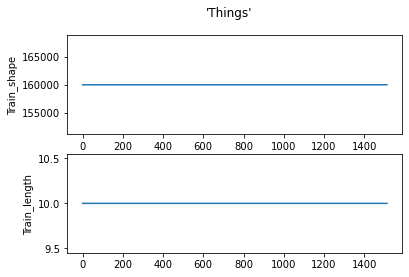

In [5]:
def plot_things(path, sr):
  plot_length = []
  plot_shape = []

  for i in tqdm(path):
    data, sample_rate = librosa.load(i, sr=sr)
    plot_shape.append(data.shape)
    plot_length.append(data.shape[0]/float(sample_rate))

  plt.subplot(211)
  plt.plot(plot_shape)
  plt.ylabel('Train_shape')

  plt.subplot(212)
  plt.plot(plot_length)
  plt.ylabel('Train_length')

  plt.suptitle('\'Things\'')
  
  plt.show()

plot_things(test_path_list, sr)

In [ ]:
# train_file_names = train_csv["file_name"].to_numpy()
# test_file_names = test_csv["file_name"].to_numpy()
target = train_csv["LABEL"].to_numpy()

def load_audio(file_names, target, path):   
  data = []
  for audio in tqdm(file_names):
    # librosa를 이용하여 데이터 로드
    an_audio, _ = librosa.load(path+audio, sr=sr)
    audio_array = np.array(an_audio)
    data.append(audio_array)
  data = np.array(data)

  label = target.copy()

  return data, label